In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd, numpy as np, os, sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML

font = {'size'   : 18}
matplotlib.rc('font', **font)

def plotHorizontalBars(series, xlabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.barh(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='x')
    plt.yticks(xpos, series.index)
    plt.xlabel(xlabel)
    plt.title(title)

def plotVerticalBars(series, ylabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.bar(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='y')
    plt.xticks(xpos, series.index)
    plt.ylabel(ylabel)
    plt.title(title)

In [3]:
import ssl, re
ssl._create_default_https_context = ssl._create_unverified_context
pd.__version__

'0.24.2'

In [4]:
# on Github, open CSV file and click on 'Raw'. Copy URL

filename = 'time_series_19-covid-Confirmed.csv'
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'+filename
ts_df = pd.read_csv(data_url)
ts_df = ts_df[~ts_df['Province/State'].astype(str).map(lambda x: re.search('Diamond Princess', x) is not None)]
ts_df = ts_df[~ts_df['Province/State'].astype(str).map(lambda x: re.search('Grand Princess', x) is not None)]
ts_df = ts_df.sort_values(['Country/Region', 'Province/State'])
print(ts_df['Country/Region'].unique())
display(ts_df)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands' 'Chile' 'China'
 'Colombia' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'Estonia' 'Eswatini' 'Ethiopia' 'Finland' 'France'
 'French Guiana' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guadeloupe'
 'Guatemala' 'Guernsey' 'Guinea' 'Guyana' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jersey' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South'
 'Kuwait' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Malaysia' 'Maldives' 'Malta' 'Martinique' 'Mauritania' 'Mexico'
 'Moldova' 'Monaco' 'Mongolia' 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
26,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,4,4,5,7,7,7,11
97,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,0,2,10,12,23,33,38
29,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,17,17,19,20,20,20,24,26,37
61,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
419,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
67,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,1,2,8,12,12,17,19,19,31,34
57,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1,1,1,1,1,1,1,4,8,18
416,NaN,Aruba,12.5211,-69.9683,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
405,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,22,26,28,38,48,55,65,65,92,112


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

lin_df = ts_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
lin_df = lin_df.groupby('Country/Region').sum().transpose()
lin_df['date_count'] = [i for i in range(lin_df.shape[0])]
display(lin_df.tail(7))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Cayman Islands,Chile,China,Colombia,Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Denmark,Dominican Republic,Ecuador,Egypt,Estonia,Eswatini,Ethiopia,Finland,France,French Guiana,Gabon,Georgia,Germany,Ghana,Greece,Guadeloupe,Guatemala,Guernsey,Guinea,Guyana,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Latvia,Lebanon,Liechtenstein,Lithuania,Luxembourg,Malaysia,Maldives,Malta,Martinique,Mauritania,Mexico,Moldova,Monaco,Mongolia,Morocco,Namibia,Nepal,Netherlands,New Zealand,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Reunion,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Venezuela,Vietnam,occupied Palestinian territory,date_count
3/8/20,4,0,19,1,0,12,1,0,76,104,9,85,3,6,200,1,0,3,20,0,4,0,2,2,64,0,8,80823,1,0,5,0,12,0,0,0,31,37,5,14,49,10,0,0,23,1129,5,0,13,1040,0,73,0,0,0,0,0,1,0,7,50,39,6,6566,60,19,61,7375,0,502,0,1,0,0,7314,64,2,32,1,1,3,99,4,3,2,0,7,1,1,0,2,0,1,265,5,1,3,176,16,6,0,1,6,10,11,30,15,0,15,17,0,0,0,36,11,4,1,0,150,3,16,3,673,1,0,0,203,337,45,50,1,0,2,0,452,1,45,274,0,0,30,0,46
3/9/20,4,2,20,1,0,12,1,0,91,131,9,95,3,6,239,1,0,3,25,1,4,0,2,2,77,0,8,80860,1,0,9,0,12,0,0,2,31,92,5,15,55,10,0,0,30,1212,5,0,15,1176,0,73,0,0,0,0,0,1,0,9,58,43,19,7161,60,21,61,9172,0,511,0,1,0,0,7478,64,6,32,1,1,3,117,4,3,2,0,7,1,1,0,2,0,1,321,5,2,3,205,16,6,0,1,7,20,16,30,18,0,15,17,0,0,0,36,15,4,1,0,150,3,16,3,1073,1,0,0,248,374,45,50,1,0,2,0,517,1,45,322,0,0,30,0,47
3/10/20,5,10,20,1,0,17,1,0,107,182,11,110,3,9,267,1,0,5,31,1,4,1,2,2,79,0,13,80887,3,0,9,0,14,0,0,3,41,264,5,15,59,12,0,0,40,1787,5,0,15,1457,0,89,0,0,0,0,0,1,0,9,69,56,27,8042,71,34,83,10149,0,581,0,1,0,0,7513,69,8,41,1,1,5,129,6,5,2,0,7,3,1,1,3,0,1,382,5,2,7,400,18,16,1,1,11,33,22,41,24,0,25,20,0,0,0,51,20,4,5,0,160,7,31,7,1695,1,0,0,355,491,47,53,1,0,5,0,892,1,74,384,0,0,31,0,48
3/11/20,7,12,20,1,0,19,1,0,128,246,11,195,3,9,314,1,2,7,38,11,7,2,3,2,108,0,23,80921,9,1,13,1,19,0,0,6,91,444,5,17,60,16,0,0,59,2284,5,0,24,1908,0,99,0,0,0,0,0,1,2,13,85,62,34,9000,71,43,109,12462,1,639,0,1,0,0,7755,72,10,61,1,3,7,149,8,6,3,0,8,3,1,1,5,0,1,503,5,2,7,598,18,19,8,5,11,49,31,59,262,1,45,20,0,0,0,62,21,4,12,0,178,10,57,13,2277,2,0,0,500,652,48,59,1,0,7,1,1214,1,74,459,0,0,38,0,49
3/12/20,7,23,24,1,0,19,4,0,128,302,11,195,3,12,314,1,2,11,52,11,7,2,3,2,117,0,23,80932,9,1,22,1,19,3,0,6,94,617,5,17,67,16,0,0,59,2284,5,0,24,2078,0,99,0,0,0,0,1,1,2,13,103,73,34,10075,71,43,131,12462,2,639,0,1,0,0,7869,80,10,61,1,3,19,149,8,6,3,0,12,3,2,1,6,0,1,503,5,2,7,702,18,20,11,5,15,52,49,59,262,1,49,28,0,0,0,69,45,4,19,0,178,16,89,17,2277,2,0,0,599,652,49,70,1,0,7,1,1596,1,85,459,0,0,39,0,50
3/13/20,7,33,26,1,1,31,8,2,200,504,15,189,3,27,559,1,3,13,151,37,23,2,5,2,191,1,43,80945,13,2,23,1,32,4,0,14,141,804,5,17,80,79,0,1,155,3667,5,0,25,3675,0,190,1,0,0,1,1,1,2,19,134,82,69,11364,101,90,161,17660,8,701,0,1,4,1,7979,80,17,77,1,6,34,197,9,12,3,0,12,6,2,1,7,0,1,804,5,2,14,996,19,28,27,6,28,64,68,112,320,5,89,45,0,0,0,80,86,10,35,0,200,32,141,24,5232,6,1,0,814,1139,50,75,1,0,16,5,2112,3,85,801,0,0,47,0,51
3/14/20,11,38,37,1,1,34,18,2,250,655,15,210,3,27,689,1,10,18,151,40,41,2,7,2,196,1,61,80977,22,2,26,1,38,4,1,26,189,836,11,28,109,115,1,1,225,4480,5,1,30,4585,3,228,1,1,1,1,1,1,2,30,156,102,96,12729,110,129,193,21157,8,773,2,1,6,1,8086,104,26,93,4,8,51,238,10,18,9,1,26,12,2,1,17,2,1,959,6,2,14,

In [6]:
log_df = lin_df.copy()
log_df[log_df == 0] = 1e-5
log_df = np.log(log_df)
log_df[log_df < 0.1] = 0.0
log_df.date_count = lin_df.date_count
display(log_df.head(4))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Cayman Islands,Chile,China,Colombia,Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Denmark,Dominican Republic,Ecuador,Egypt,Estonia,Eswatini,Ethiopia,Finland,France,French Guiana,Gabon,Georgia,Germany,Ghana,Greece,Guadeloupe,Guatemala,Guernsey,Guinea,Guyana,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Latvia,Lebanon,Liechtenstein,Lithuania,Luxembourg,Malaysia,Maldives,Malta,Martinique,Mauritania,Mexico,Moldova,Monaco,Mongolia,Morocco,Namibia,Nepal,Netherlands,New Zealand,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Reunion,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Venezuela,Vietnam,occupied Palestinian territory,date_count
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.306275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.466145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,1
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.824374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,1.609438,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,2
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.248504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,1.945910,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,3


Country/Region,date_count,US,Italy,"Korea, South",Germany,France,Iran
3/8/20,46,452,7375,7314,1040,1129,6566
3/9/20,47,517,9172,7478,1176,1212,7161
3/10/20,48,892,10149,7513,1457,1787,8042
3/11/20,49,1214,12462,7755,1908,2284,9000
3/12/20,50,1596,12462,7869,2078,2284,10075
3/13/20,51,2112,17660,7979,3675,3667,11364
3/14/20,52,2660,21157,8086,4585,4480,12729


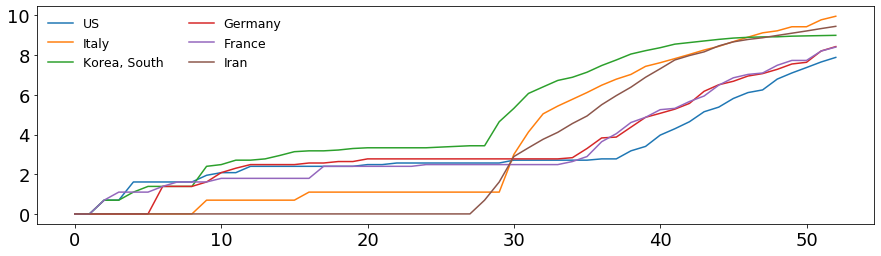

In [7]:
countries = ['Mainland China', 'US', 'Italy', 'Korea, South', 'Germany']
countries = ['US', 'Italy', 'Korea, South', 'Germany', 'France', 'Iran']
display(lin_df[['date_count'] + countries].tail(7))

fig, ax = plt.subplots(figsize=(15, 4))
for country in countries:
    ax.plot(log_df.date_count, log_df[country], label=country)
ax.legend(frameon=False, ncol=2, fontsize='x-small')

(16, 2)


Country/Region,date_count,US
2/28/20,37,16
2/29/20,38,24
3/1/20,39,30
3/2/20,40,53
3/3/20,41,73
3/4/20,42,104
3/5/20,43,172
3/6/20,44,217
3/7/20,45,336
3/8/20,46,452


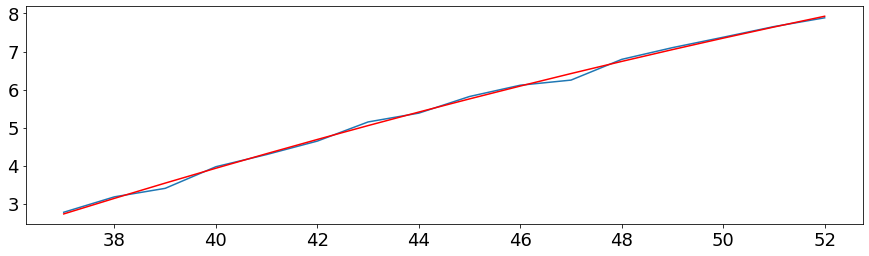

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

country = 'US'
df = lin_df[['date_count', country]].copy()
df = df[df.date_count >= 37]
#df = df.head(df.shape[0]-1)
print(df.shape)
display(df)

x = df.date_count.values.reshape(-1, 1)
x2 = x * x
y = df[country].values.reshape(-1, 1)
y = np.log(y)
regressor = LinearRegression()
regressor.fit(np.c_[x, x2], y)
y_fit = regressor.predict(np.c_[x, x2])

plt.figure(figsize=(15, 4))
plt.plot(x, y)
plt.plot(x, y_fit, color='red')
plt.show()

In [15]:
x_fut = x.copy()
x_fut -= x.min()
x_fut += x.max()
y_fut = regressor.predict(np.c_[x_fut, x_fut*x_fut])
print(y_fut)
y_fut = np.exp(y_fut)
mat = np.c_[x_fut, y_fut].astype(int)
print(mat)

[[ 7.92745255]
 [ 8.20185732]
 [ 8.46723916]
 [ 8.72359808]
 [ 8.97093407]
 [ 9.20924713]
 [ 9.43853728]
 [ 9.65880449]
 [ 9.87004878]
 [10.07227015]
 [10.26546859]
 [10.44964411]
 [10.6247967 ]
 [10.79092637]
 [10.94803312]
 [11.09611693]]
[[   52  2772]
 [   53  3647]
 [   54  4756]
 [   55  6146]
 [   56  7870]
 [   57  9989]
 [   58 12563]
 [   59 15659]
 [   60 19342]
 [   61 23677]
 [   62 28723]
 [   63 34532]
 [   64 41142]
 [   65 48578]
 [   66 56842]
 [   67 65914]]
